In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.decomposition import PCA
import alphashape
from shapely.geometry import Polygon
from qibo import models
from qaoa_utils import exprectum_hamiltonian, create_gibbs_state, expected_value, sample_state, build_maxcut_hamiltonian, build_mixer_hamiltonian, create_random_state

In [3]:
def area_envolvente_concava(puntos, alpha):

    alpha_shape = alphashape.alphashape(puntos, alpha)
    return alpha_shape.area, alpha_shape

In [4]:
def pintar_envolvente_concava(puntos, alpha, componentsDf):
    # Crear la figura y los ejes
    plt.figure(figsize=(12, 10))

    # Calcular la envolvente cóncava usando alphashape
    alpha_shape = alphashape.alphashape(puntos, alpha)

    # Gráfico de scatter para el primer eje (ax[0])
    sns.scatterplot(data=componentsDf, x="PC1", y="PC2", palette=sns.color_palette("Spectral", as_cmap=True))


    # Agregar la envolvente cóncava al primer gráfico (ax[0])
    if isinstance(alpha_shape, Polygon):
        x, y = alpha_shape.exterior.xy
        plt.plot(x, y, 'k-', lw=1.5)  # Contorno de la envolvente
        plt.fill(x, y, 'c', alpha=0.3)  # Relleno de la envolvente


    plt.gca().set_aspect('equal', adjustable='box')

    # Mostrar los gráficos
    plt.show()

In [5]:
def compute_probabilities(init_state, alpha, beta):
    point_probabilities = []
    for a in alpha:
        for b in beta:
            
            final_parameters = np.array([a, b])
            
            qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)
            
            qaoa.set_parameters(final_parameters)
            
            quantum_state = qaoa.execute(initial_state = init_state)
            
            probabilities = np.real(quantum_state*quantum_state.conj())
            
            point_probabilities.append(probabilities)
    return point_probabilities

In [6]:
n = 6
p = 0.5

G = nx.erdos_renyi_graph(n, p, seed = 4)

dict_values = exprectum_hamiltonian(G)

gibbs_state = create_gibbs_state(dict_values, t = 5)

expected_value_gibbs_state = expected_value(state = gibbs_state, dict_values = dict_values)




hamiltonian = build_maxcut_hamiltonian(graph = G)

mixer_hamiltonian = build_mixer_hamiltonian(graph = G)



alpha = np.linspace(0, 2 * np.pi, 50)
beta = np.linspace(0, 2 * np.pi, 50)

angle_params = []

point_probabilities = []

for a in alpha:
    for b in beta:
        
        angle_params.append([alpha,beta])
        
        final_parameters = np.array([a, b])
        
        qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)
        
        qaoa.set_parameters(final_parameters)
        
        quantum_state = qaoa.execute(initial_state = gibbs_state)
        
        probabilities = np.real(quantum_state*quantum_state.conj())
        point_probabilities.append(probabilities)
        

angle_params = np.array(angle_params)

angle_params = []
for a in alpha:
    for b in beta:
        angle_params.append([a,b])
angle_params = np.array(angle_params)
    

[Qibo 0.2.8|INFO|2024-09-06 12:07:08]: Using qibojit (numba) backend on /CPU:0


<Axes: xlabel='PC1', ylabel='PC2'>

<Figure size 1200x600 with 0 Axes>

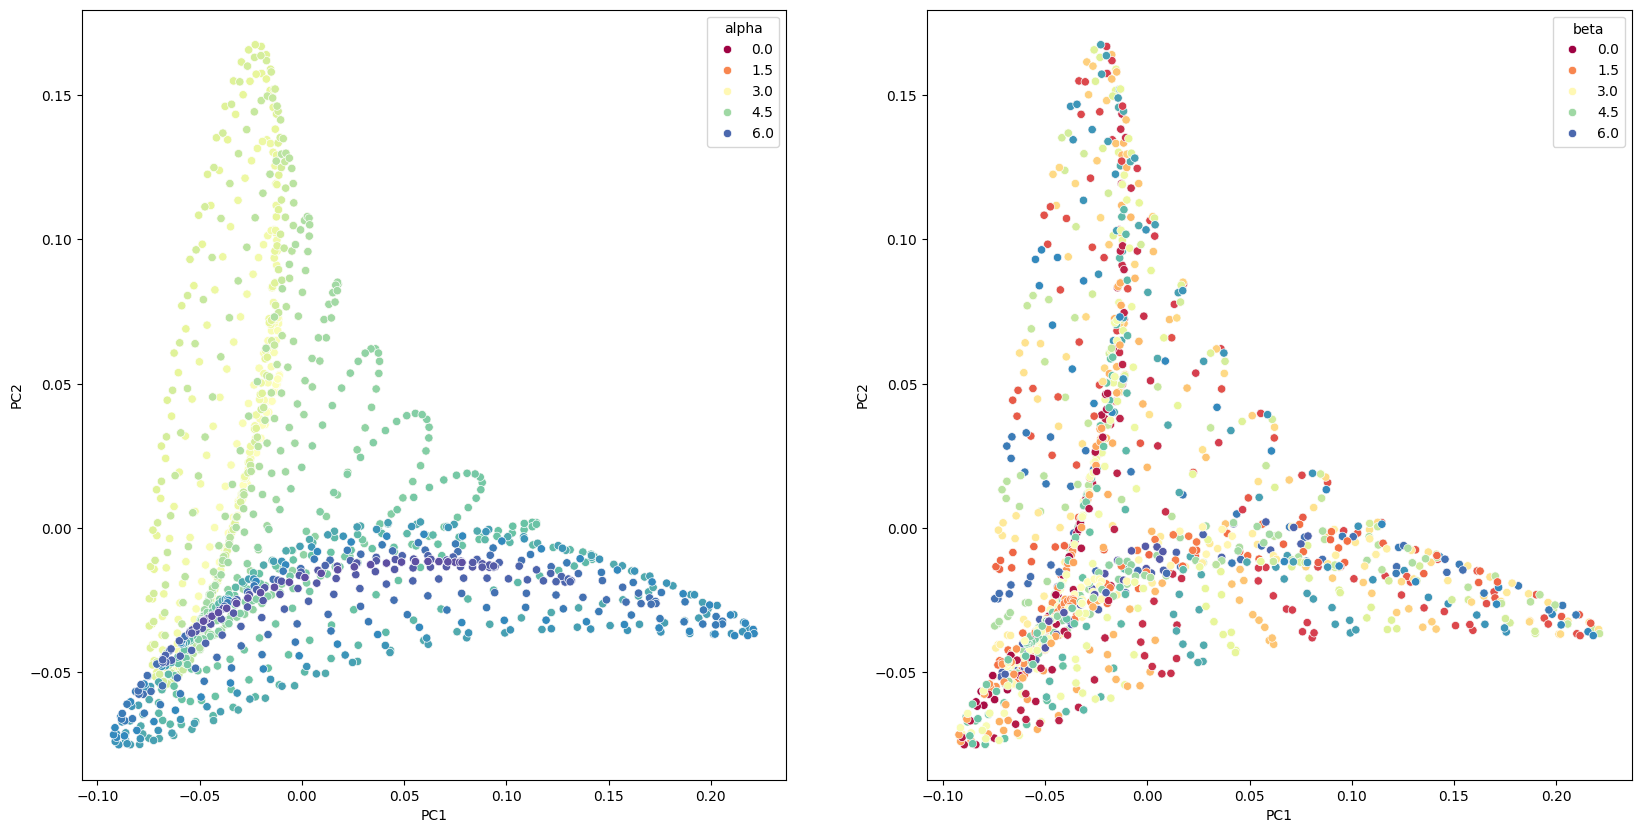

In [7]:
pca = PCA(n_components = 4)
pca_point_probabilities = pca.fit_transform(np.array(point_probabilities))
componentsDf = pd.DataFrame(data = pca_point_probabilities, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
componentsDf["alpha"] = angle_params[:,0]
componentsDf["beta"] = angle_params[:,1]

plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1,2, figsize = (20,10))

sns.scatterplot(data=componentsDf, x="PC1", y="PC2", hue='alpha', palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[0]) 
sns.scatterplot(data=componentsDf, x="PC1", y="PC2", hue='beta', palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[1]) 


Área de la envolvente cóncava: 0.025694347791204105


C:\Users\anava\AppData\Local\Temp\ipykernel_21044\4086406974.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=componentsDf, x="PC1", y="PC2", palette=sns.color_palette("Spectral", as_cmap=True))


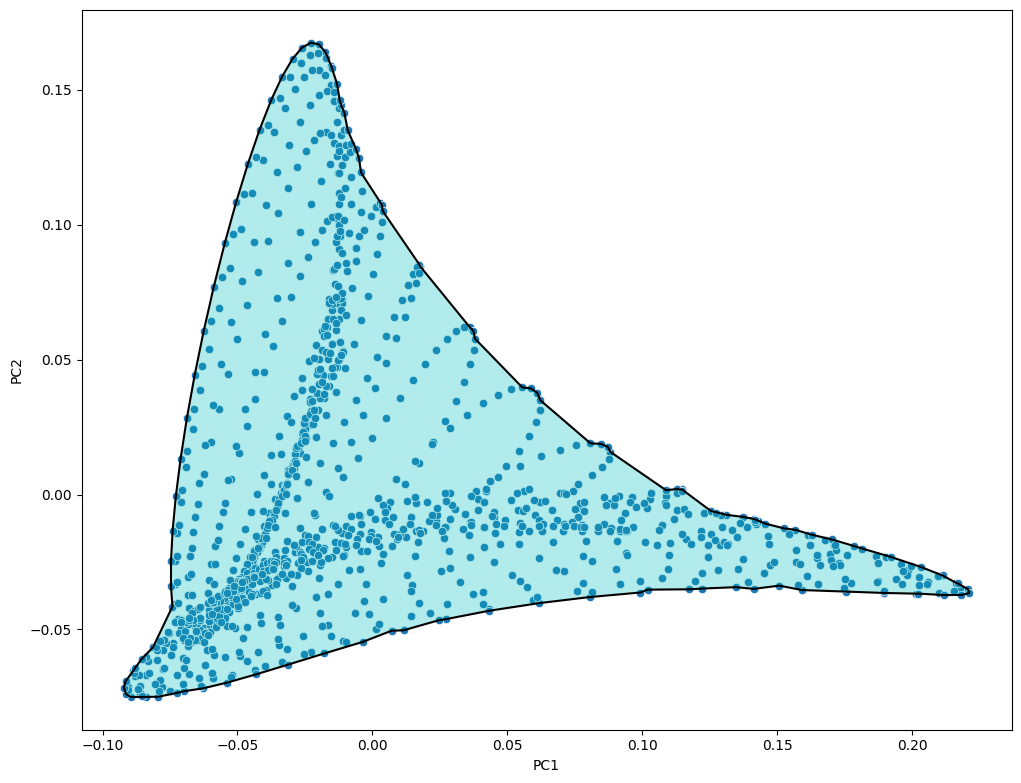

In [8]:
alpha = 50
area, alpha_shape = area_envolvente_concava(componentsDf[['PC1','PC2']].to_numpy(), alpha)
print("Área de la envolvente cóncava:", area)

pintar_envolvente_concava(componentsDf[['PC1','PC2']].to_numpy(), alpha, componentsDf)

C:\Users\anava\AppData\Local\Temp\ipykernel_21044\3610074229.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=componentsDf, x="PC1", y="PC2",


<Figure size 3000x1000 with 0 Axes>

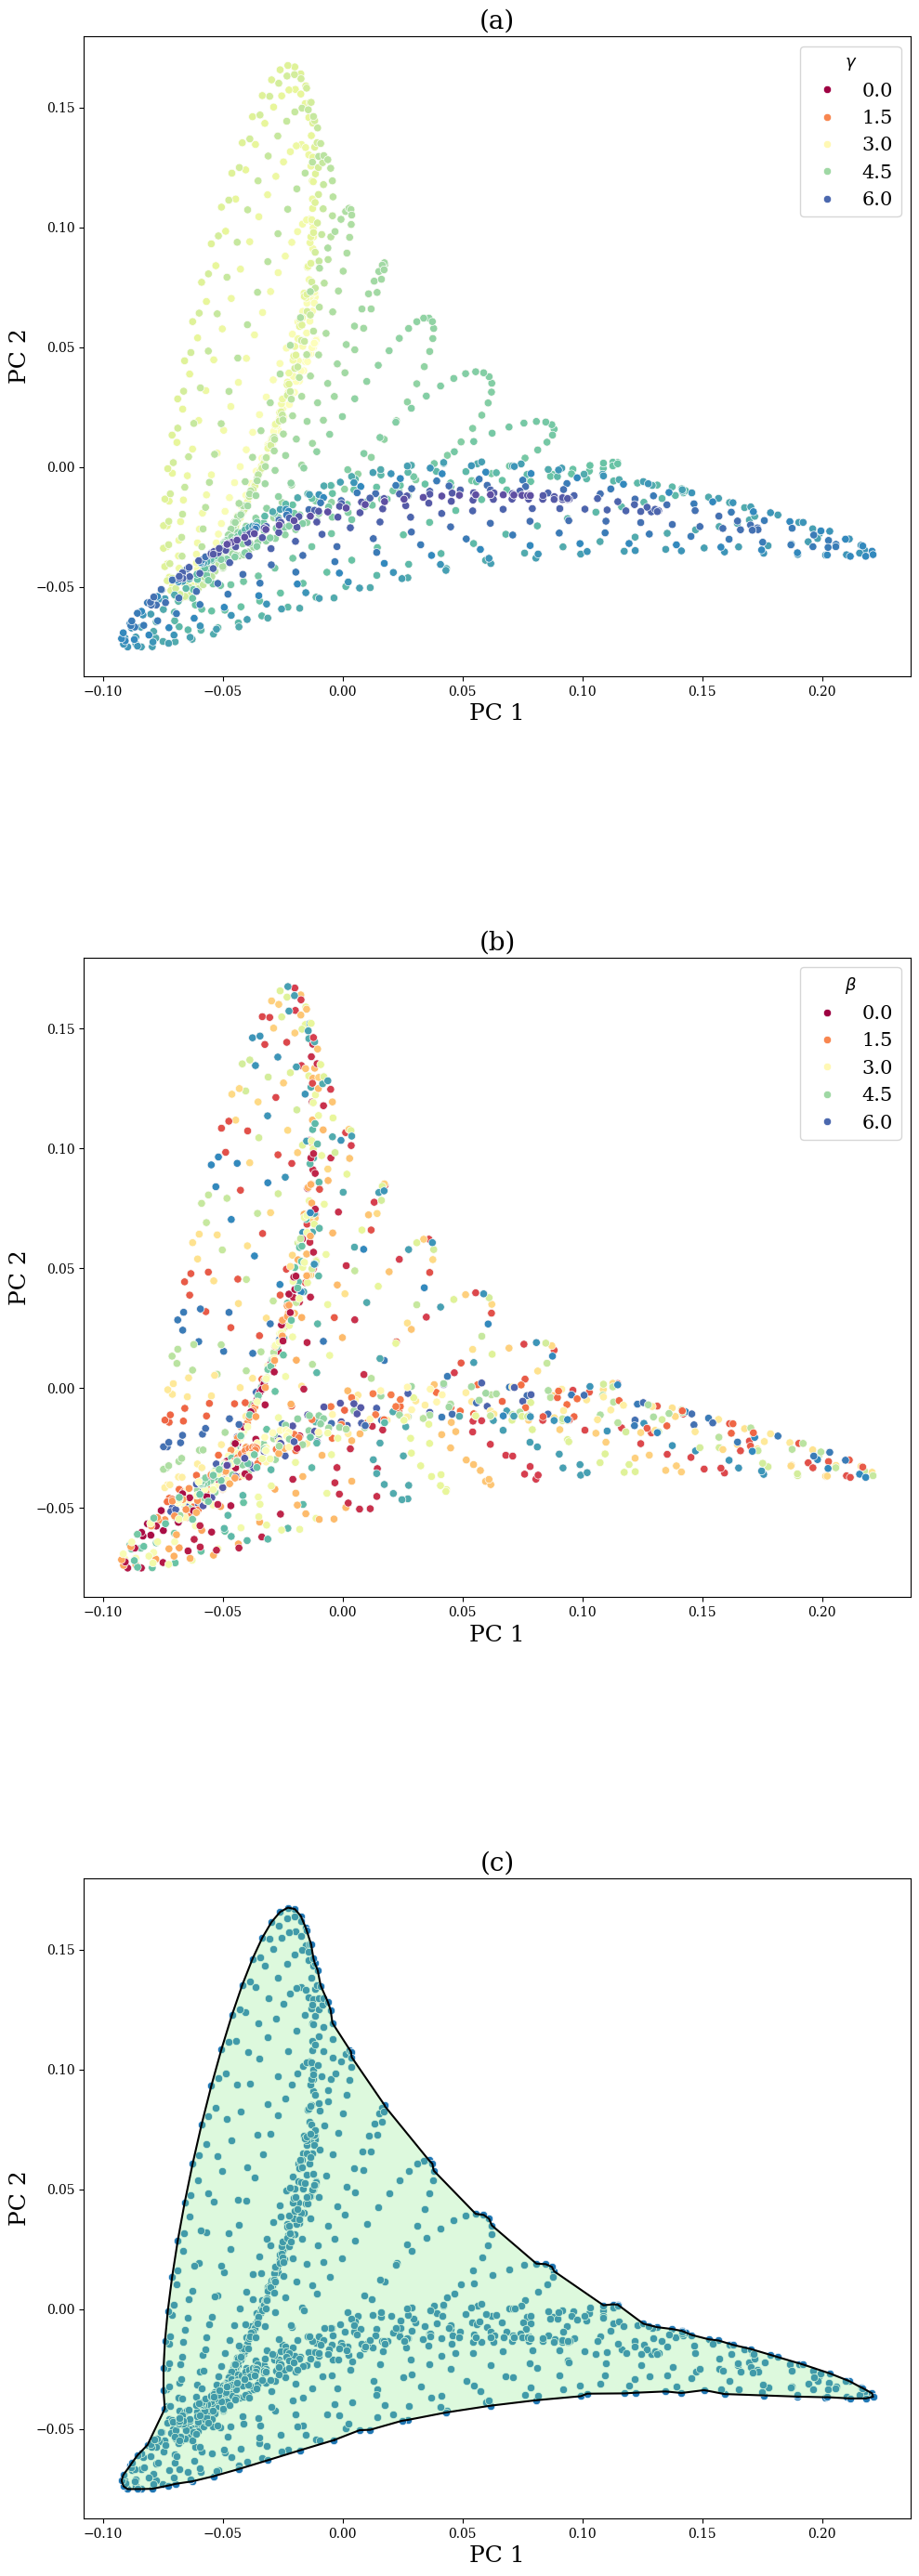

In [9]:
plt.figure(figsize=(30, 10))
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(3, 1, figsize=(10, 30))

# Gráfico 1: scatterplot con hue='alpha'
scatter1 = sns.scatterplot(data=componentsDf, x="PC1", y="PC2", hue='alpha', 
                           palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[0])

ax[0].set_xlabel("PC 1", fontsize=18)  # Cambiar tamaño del label del eje x
ax[0].set_ylabel("PC 2", fontsize=18)  #

scatter1.legend(title=r"$\gamma$", title_fontsize='13', fontsize='15')

# Gráfico 2: scatterplot con hue='beta'
scatter2 = sns.scatterplot(data=componentsDf, x="PC1", y="PC2", hue='beta', 
                palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[1])

ax[1].set_xlabel("PC 1", fontsize=18)  # Cambiar tamaño del label del eje x
ax[1].set_ylabel("PC 2", fontsize=18)

scatter2.legend(title=r"$\beta$", title_fontsize='13', fontsize='15')

# Gráfico 3: scatterplot con envolvente cóncava
alpha_shape = alphashape.alphashape(componentsDf[['PC1','PC2']].to_numpy(), alpha)

sns.scatterplot(data=componentsDf, x="PC1", y="PC2", 
                palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[2])

# Agregar la envolvente cóncava al tercer gráfico
if isinstance(alpha_shape, Polygon):
    x, y = alpha_shape.exterior.xy
    ax[2].plot(x, y, 'k-', lw=1.5)  # Contorno de la envolvente
    ax[2].fill(x, y, 'lightgreen', alpha=0.3)  # Relleno de la envolvente

ax[2].set_facecolor('white')
ax[2].set_xlabel("PC 1", fontsize=18)  # Cambiar tamaño del label del eje x
ax[2].set_ylabel("PC 2", fontsize=18)

# Ajustes adicionales para cada gráfico
for i in range(3):
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].grid(False)


# Títulos para cada subplot
ax[0].set_title('(a)', fontsize=20)
ax[1].set_title('(b)', fontsize=20)
ax[2].set_title('(c)', fontsize=20)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [2]:
results =pd.read_csv("logger_data/logger_data_qaoa_performance_gibbs_states_expressivity_random_energy_n_10")


results['Area_norm'] = results['Area'] / results['Area'].max()


In [3]:
# Initialize an empty DataFrame with proper columns
df_entropia_area = pd.DataFrame(columns=['area', 'entropia'])

for i in np.arange(0.1, 1.1, 0.1).round(2):

    list_entropy_gibbs_state = []
    list_entropy_pseudo_gibbs_state = []
    list_area_qaoa_gibbs_state = []
    list_area_qaoa_pseudo_gibbs_state = []
    
    for j in range(100):
        
        path_data_qaoa = f"logger_data/logger_data_qaoa_performance_gibbs_states_expressivity_same_energy/n_nodes_10_case_{j}_temperature_4_delta_gauss_{i}.json"
        
        with open(path_data_qaoa) as f:
            data = json.load(f)
        
        entropy_gibbs = data['entropy_gibbs_state']
        entropy_psgibbs = data['entropy_psgibbs_state']
        area_qaoa_gibbs = data['area_gibbs_state']
        area_qaoa_psgibbs = data['area_psgibbs_state']
        
        list_entropy_pseudo_gibbs_state.append(abs(entropy_psgibbs) / entropy_gibbs)
        list_entropy_gibbs_state.append(entropy_gibbs / entropy_gibbs)  # This is always 1, is that intended?
        list_area_qaoa_gibbs_state.append(abs(area_qaoa_gibbs / area_qaoa_gibbs))  # This is always 1
        list_area_qaoa_pseudo_gibbs_state.append(abs(area_qaoa_psgibbs / area_qaoa_gibbs))
        
        # Create a temporary DataFrame for the current iteration
        temp_df = pd.DataFrame({
            'area': [abs(area_qaoa_psgibbs / area_qaoa_gibbs)],
            'entropia': [abs(entropy_psgibbs) / entropy_gibbs]
        })
        
        # Append the current iteration's data to the main DataFrame
        df_entropia_area = pd.concat([df_entropia_area, temp_df], ignore_index=True)


C:\Users\anava\AppData\Local\Temp\ipykernel_11600\1988002979.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


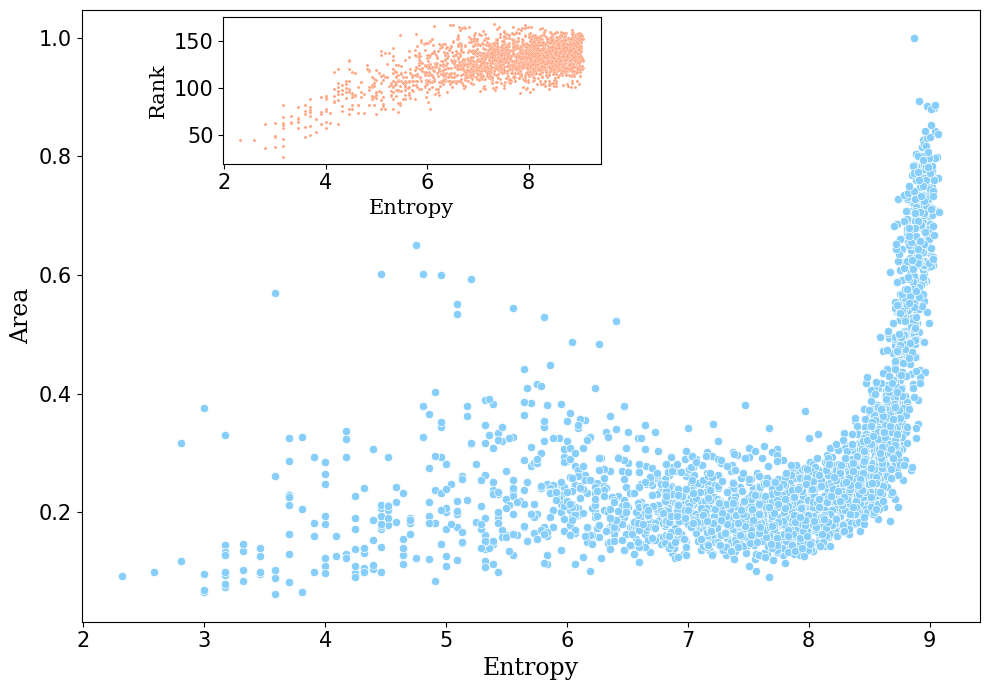

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 7))

# Scatter plot para el DataFrame 'results'
sns.scatterplot(x='Entropy', y='Area_norm', data=results, ax=ax1, color='lightskyblue')
ax1.set_xlabel('Entropy', fontsize=17, family='serif')
ax1.set_ylabel('Area', fontsize=17, family='serif')

# Añadimos el segundo subplot dentro del primero
ax2 = inset_axes(ax1, width="30%", height="20%", loc='upper left', 
                  bbox_to_anchor=(0.15, -0.2, 1.4, 1.2),  # Posición y tamaño del inset
                  bbox_transform=ax1.transAxes)

# Scatter plot para el DataFrame 'df_entropia_area' en el inset
sns.scatterplot(x='Entropy', y='Rank', data=results, ax=ax2, 
                color='lightsalmon', s=5)  # Cambiar el color a azul claro y ajustar el tamaño de los puntos
ax2.set_xlabel('Entropy', fontsize=15, family='serif')
ax2.set_ylabel('Rank', fontsize=15, family='serif')


# Ajustamos los límites del gráfico pequeño para mejor visualización
#ax2.set_xlim(30, 180)
#ax2.set_ylim(ax1.get_ylim())  # Igualar límites del eje y con el gráfico principal

# Ajustar el tamaño de las etiquetas
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

# Cambiar la fuente a serif para todo el gráfico
plt.rc('font', family='serif')

# Mostramos el gráfico
plt.tight_layout()
plt.show()
